# プログラミング演習評価

## 概要


以下の課題を実施してもらいその結果を3段階で評価する。

- フィボナッチ数列 アルゴリズムの実装を制限時間２０分でやる。

評価は各課題内容を以下の項目に分けてポイント付けして総合得点にて評価する。

- フィボナッチ数列
    - テストコードを書いている + 1
        - アルゴリズムを網羅している + 1
        - 例外系を考慮している + 1
    - プロダクトコードを書いている + 1
        - アルゴリズムは未完成 + 1
        - アルゴリズムを完成 + 1
    - その他
        - バージョン管理システム・自動テストの実行等の工夫をしている

## 評価

In [181]:
# 前処理
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
df = pd.read_csv("./data/score.csv")
df

,number,name,fib_test,fib_prod,fib_other
0,1,方,1,1,0
1,2,大野,1,1,0
2,3,河野,1,1,0
3,4,磯部,0,0,0
4,5,川村,0,0,0
5,6,若狭,1,0,0
6,7,草場,1,1,0
7,8,福原,2,2,0
8,9,井沢,1,0,0


In [182]:
# スコア計算
df.set_index('number', inplace=True)
df['score'] = df['fib_test'] + df['fib_prod'] + df['fib_other']
df['test_score'] = df['fib_test']
df['prod_score'] = df['fib_prod']
df['total_score'] = (df['test_score'] * 1.5) + df['prod_score'] + df['fib_other']

# 評価
df.loc[df['total_score'] >= 0, 'result'] = '不可'
df.loc[df['total_score'] > 2, 'result'] = '可'
df.loc[df['total_score'] > 3, 'result'] = '良'
df.loc[df['total_score'] > 4, 'result'] = '優'
df.loc[df['result'] == '優', 'result_score'] = 4
df.loc[df['result'] == '良', 'result_score'] = 3
df.loc[df['result'] == '可', 'result_score'] = 2
df.loc[df['result'] == '不可', 'result_score'] = 1

# 結果表示
df[['name', 'result', 'total_score', 'result_score']].sort_values(by=['result_score'], ascending=False)

,name,result,total_score,result_score
number,,,,
8,福原,優,5.0,4.0
1,方,可,2.5,2.0
2,大野,可,2.5,2.0
3,河野,可,2.5,2.0
7,草場,可,2.5,2.0
4,磯部,不可,0.0,1.0
5,川村,不可,0.0,1.0
6,若狭,不可,1.5,1.0
9,井沢,不可,1.5,1.0


<AxesSubplot:title={'center':'トータルスコア分布'}, xlabel='name', ylabel='total_score'>

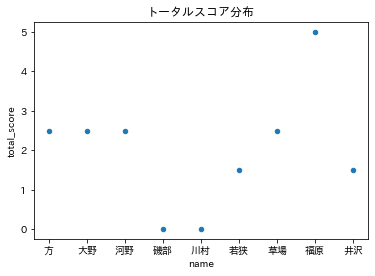

In [183]:
df.plot(kind='scatter', x='name',y='total_score', title='トータルスコア分布')

(array([4., 4., 0., 1.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <BarContainer object of 4 artists>)

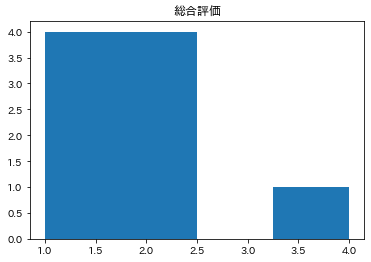

In [184]:
plt.title('総合評価')
plt.hist(df['result_score'], bins=4)

## 分析

In [185]:
df

,name,fib_test,fib_prod,fib_other,score,test_score,prod_score,total_score,result,result_score
number,,,,,,,,,,
1,方,1,1,0,2,1,1,2.5,可,2.0
2,大野,1,1,0,2,1,1,2.5,可,2.0
3,河野,1,1,0,2,1,1,2.5,可,2.0
4,磯部,0,0,0,0,0,0,0.0,不可,1.0
5,川村,0,0,0,0,0,0,0.0,不可,1.0
6,若狭,1,0,0,1,1,0,1.5,不可,1.0
7,草場,1,1,0,2,1,1,2.5,可,2.0
8,福原,2,2,0,4,2,2,5.0,優,4.0
9,井沢,1,0,0,1,1,0,1.5,不可,1.0


In [186]:
df.describe()

,fib_test,fib_prod,fib_other,score,test_score,prod_score,total_score,result_score
count,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.888889,0.666667,0.0,1.555556,0.888889,0.666667,2.000000,1.777778
std,0.600925,0.707107,0.0,1.236033,0.600925,0.707107,1.520691,0.971825
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.500000,1.000000
50%,1.000000,1.000000,0.0,2.000000,1.000000,1.000000,2.500000,2.000000
75%,1.000000,1.000000,0.0,2.000000,1.000000,1.000000,2.500000,2.000000
max,2.000000,2.000000,0.0,4.000000,2.000000,2.000000,5.000000,4.000000


(array([2., 2., 4., 0., 1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

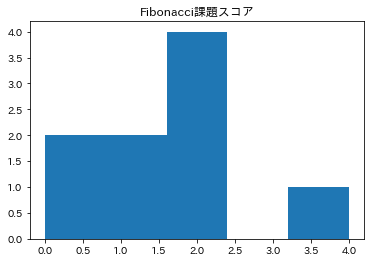

In [187]:
plt.title('Fibonacci課題スコア')
plt.hist(df['score'], bins=5)

(array([2., 0., 6., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

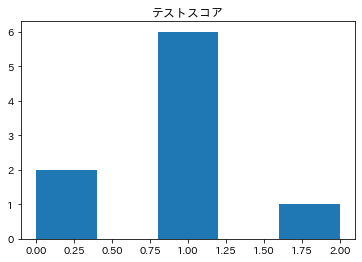

In [188]:
plt.title('テストスコア')
plt.hist(df['test_score'], bins=5)

(array([4., 0., 4., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

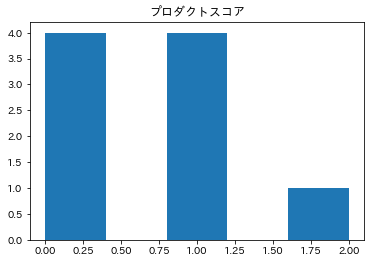

In [189]:
plt.title('プロダクトスコア')
plt.hist(df['prod_score'], bins=5)

(array([2., 0., 2., 4., 0., 0., 1.]),
 array([0.        , 0.71428571, 1.42857143, 2.14285714, 2.85714286,
        3.57142857, 4.28571429, 5.        ]),
 <BarContainer object of 7 artists>)

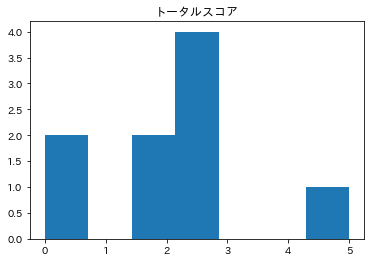

In [190]:
plt.title('トータルスコア')
plt.hist(df['total_score'], bins=7)